In [1]:
import dLuxToliman as dlT
from matplotlib import pyplot as plt, cm
import matplotlib as mpl
import ehtplot
import jax.numpy as np
import scienceplots
import cmasher as cmr


# matplotlib parameters
plt.style.use(["science", "bright", "no-latex"])

plt.rcParams["image.cmap"] = "inferno"
plt.rcParams["font.family"] = "serif"
plt.rcParams["image.origin"] = "lower"
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 8
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"

cividis = mpl.colormaps["cividis"]
viridis = mpl.colormaps["viridis"]

cividis.set_bad("k", 1.0)
viridis.set_bad("k", 1.0)

In [2]:
osys = dlT.TolimanOpticalSystem(oversample=16)
src = dlT.AlphaCen(position_angle=240, n_wavels=9)
tel = dlT.Toliman(osys, src)

In [3]:
binary = tel.model()
single = tel.optics.propagate(1e-9 * src.wavelengths)  # , weights=src.weights[0])

opd = tel.optics.pupil.opd
aperture = tel.optics.aperture.transmission
pupil = np.where(aperture, opd, np.nan) / (
    (1e-9 * src.wavelengths).mean() / (2 * np.pi)
)

In [7]:
cmaps = [
    # "viridis",
    # "plasma",
    # "inferno",
    # "cmr.sapphire",
    "magma",
    # "cmr.voltage",
    # "cmr.voltage_r",
    # "cmr.ocean",
    # "cmr.bubblegum",
    # 'afmhot_10u',
    # 'grey',
    # 'flag',
    # "prism",
]

exps = [
    # 1,
    # 0.9,
    # 0.8,
    0.75,
    # 0.7,
    # 0.6,
    # 0.5,
    # 0.4,
    # 0.3,
    # 0.2,
]

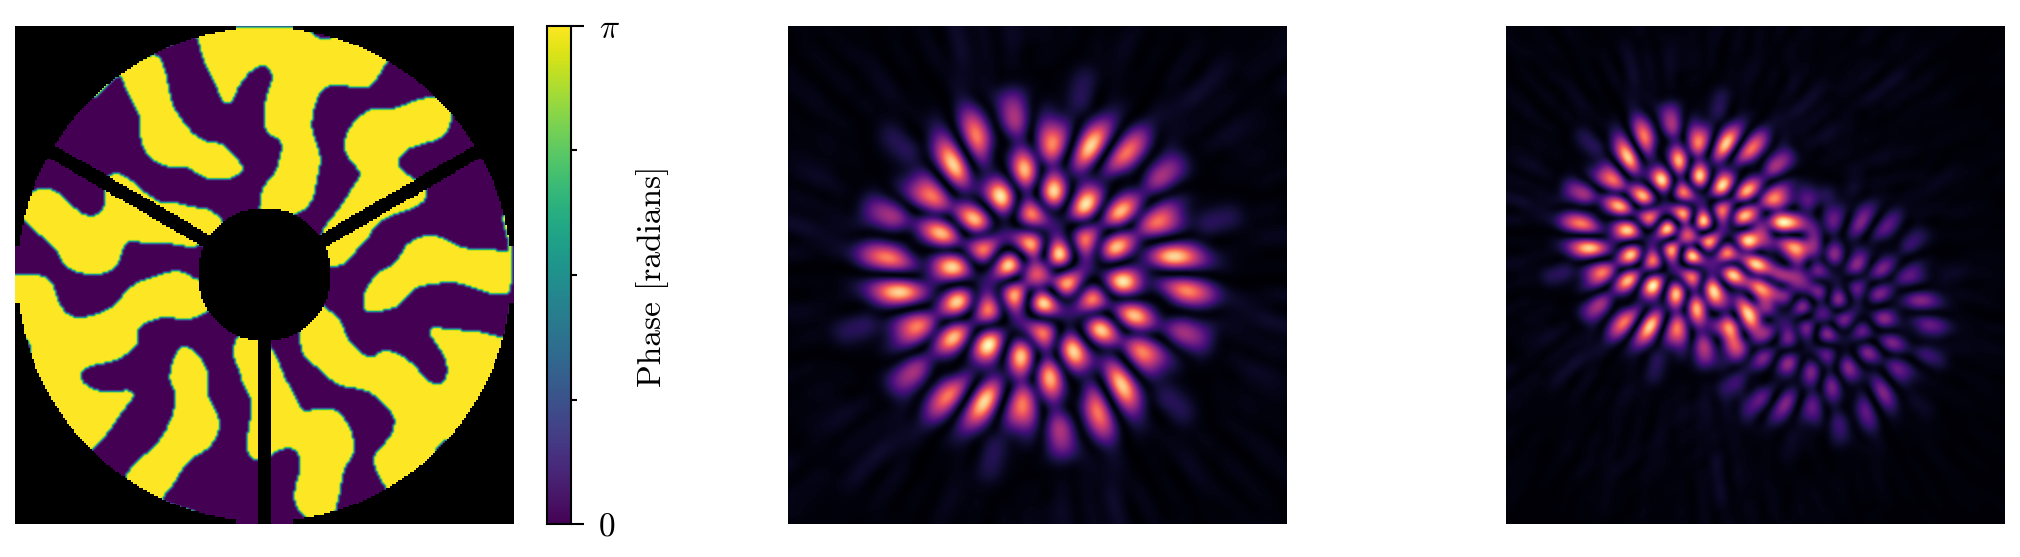

In [12]:
from matplotlib.transforms import Affine2D

zoom1 = 2.1  # zoom factor
zoom2 = 1.5  # zoom factor

for cmap in cmaps:
    for exp in exps:

        fig, ax = plt.subplots(1, 3, figsize=(7.2, 2))

        im = ax[0].imshow(
            pupil, cmap=viridis, vmin=0, vmax=np.pi, interpolation="bicubic"
        )
        ax[0].axis("off")
        cbar = fig.colorbar(im, ax=ax[0])
        cbar.set_ticks([0, np.pi])
        cbar.set_ticklabels(["0", r"$\pi$"])
        cbar.set_label("Phase [radians]")

        # Compute center
        h, w = single.shape
        cx, cy = w / 2, h / 2

        # Set center as origin and zoom
        trans1 = Affine2D().scale(zoom1).translate(-cx * (zoom1 - 1), -cy * (zoom1 - 1))
        trans2 = Affine2D().scale(zoom2).translate(-cx * (zoom2 - 1), -cy * (zoom2 - 1))

        ax[1].imshow(
            single,
            cmap,
            transform=trans1 + ax[1].transData,
            norm=mpl.colors.PowerNorm(exp),
        )
        ax[1].set_xlim(0, w)
        ax[1].set_ylim(h, 0)
        ax[1].axis("off")

        ax[2].imshow(
            binary,
            cmap,
            transform=trans2 + ax[2].transData,
            norm=mpl.colors.PowerNorm(exp),
        )
        ax[2].set_xlim(0, w)
        ax[2].set_ylim(h, 0)
        ax[2].axis("off")

        plt.tight_layout()
        plt.savefig(
            f"figures/fig4vir.pdf",
            bbox_inches="tight",
            dpi=600,
            transparent=True,
        )
        plt.show()